In [221]:
#import all needed libs

import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

## Data Preparation
### Importing and Understanding Data
### Check for nulls, Non numeric,
### Comvert categorical to hot encoded - Dummy Variables

## Check the corr to visually check first level of correlation

## Apply the concetps of MLR

In [222]:
# read the data and check the basic data

rental_df = pd.read_csv("day.csv")
rental_df.shape

(730, 16)

In [223]:
rental_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [224]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [225]:
rental_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [226]:
# convert all the categrical numeric values proper strings
# Then to hot encoding to using get_dummies func

print(rental_df['season'].unique())
print(rental_df['weathersit'].unique())

[1 2 3 4]
[2 1 3]


In [227]:
rental_df['season'] = rental_df['season'].map({1:"spring", 2:'summer', 3: 'fall', 4: 'winter'})
rental_df['weathersit'] = rental_df['weathersit'].map({1: 'clear', 2: 'cloudy_mist', 3:'light_snow_rain', 4:'heavy_rain'})
rental_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,cloudy_mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,cloudy_mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [228]:

print(rental_df['season'].unique())
print(rental_df['weathersit'].unique())

rental_bike_df = rental_df
rental_df = rental_bike_df

['spring' 'summer' 'fall' 'winter']
['cloudy_mist' 'clear' 'light_snow_rain']


In [229]:
status = pd.get_dummies(rental_df['season'], drop_first=True).astype(int)

# Rename columns to be more descriptive
status.columns = ['season_' + col for col in status.columns]

# Concatenate the dummy variables with the original DataFrame
rental_df = pd.concat([rental_df, status], axis=1)

# Drop the original 'season' column
rental_df.drop('season', axis=1, inplace=True)

# Display the first few rows to check
rental_df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter
0,1,01-01-2018,0,1,0,6,0,cloudy_mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,0,1,0,0,0,cloudy_mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [230]:
status = pd.get_dummies(rental_df['weathersit'], drop_first=True).astype(int)

# Rename columns to be more descriptive
status.columns = ['weathersit' + col for col in status.columns]

# Concatenate the dummy variables with the original DataFrame
rental_df = pd.concat([rental_df, status], axis=1)

# Drop the original 'season' column
rental_df.drop('weathersit', axis=1, inplace=True)

# Display the first few rows to check
rental_df.head()


,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersitcloudy_mist,weathersitlight_snow_rain
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,1,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [231]:
rental_df.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_spring', 'season_summer', 'season_winter',
       'weathersitcloudy_mist', 'weathersitlight_snow_rain'],
      dtype='object')

In [232]:
rental_df.drop('dteday', axis=1, inplace=True)
rental_df.columns

Index(['instant', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_spring', 'season_summer', 'season_winter',
       'weathersitcloudy_mist', 'weathersitlight_snow_rain'],
      dtype='object')

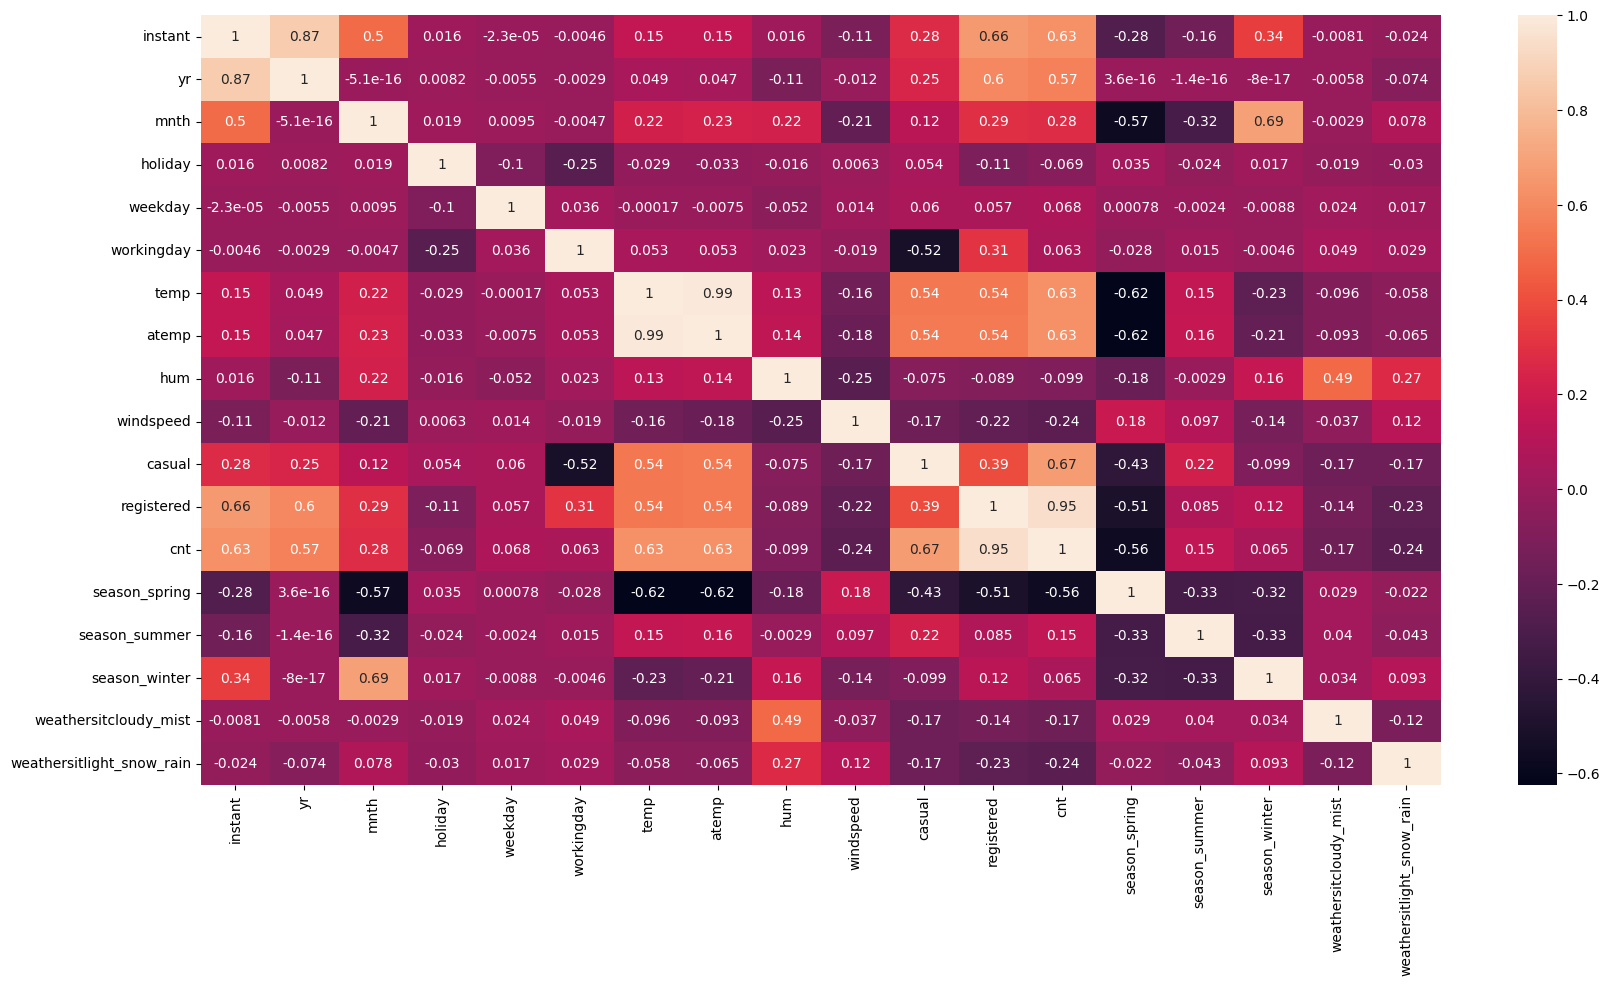

In [233]:
plt.figure(figsize=(20,10))
cor = rental_df.corr()
sns.heatmap(cor, annot=True)
plt.show()

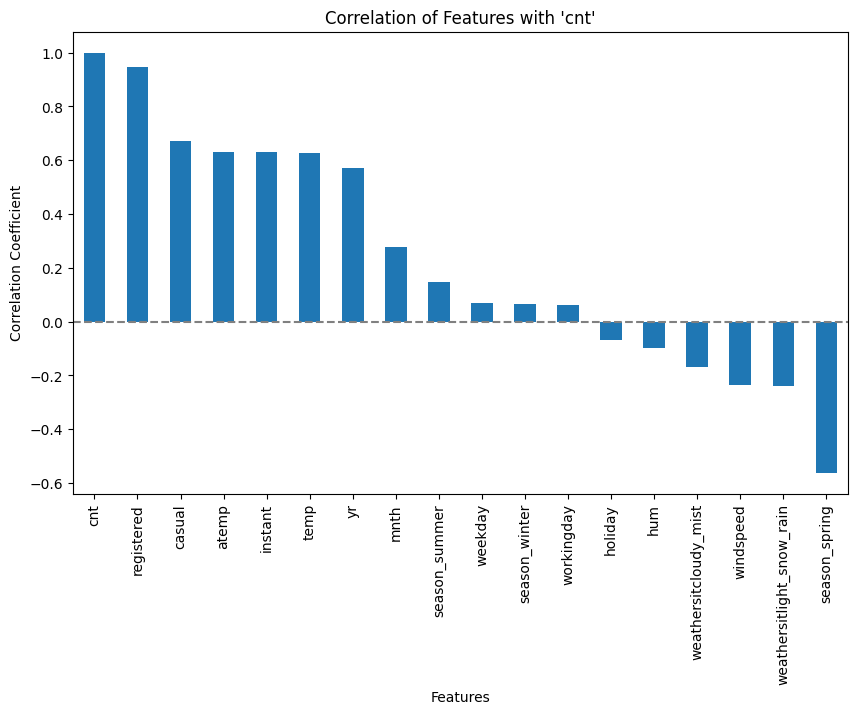

In [234]:
cor = rental_df.corr()['cnt'].sort_values(ascending=False)

# To understand more wrt target variable cnt
plt.figure(figsize=(10, 6))
cor.plot(kind='bar')
plt.title("Correlation of Features with 'cnt'")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.axhline(0, color='gray', linestyle='--')  # Add a horizontal line at 0 for reference
plt.show()

In [235]:
rental_df.columns

Index(['instant', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_spring', 'season_summer', 'season_winter',
       'weathersitcloudy_mist', 'weathersitlight_snow_rain'],
      dtype='object')

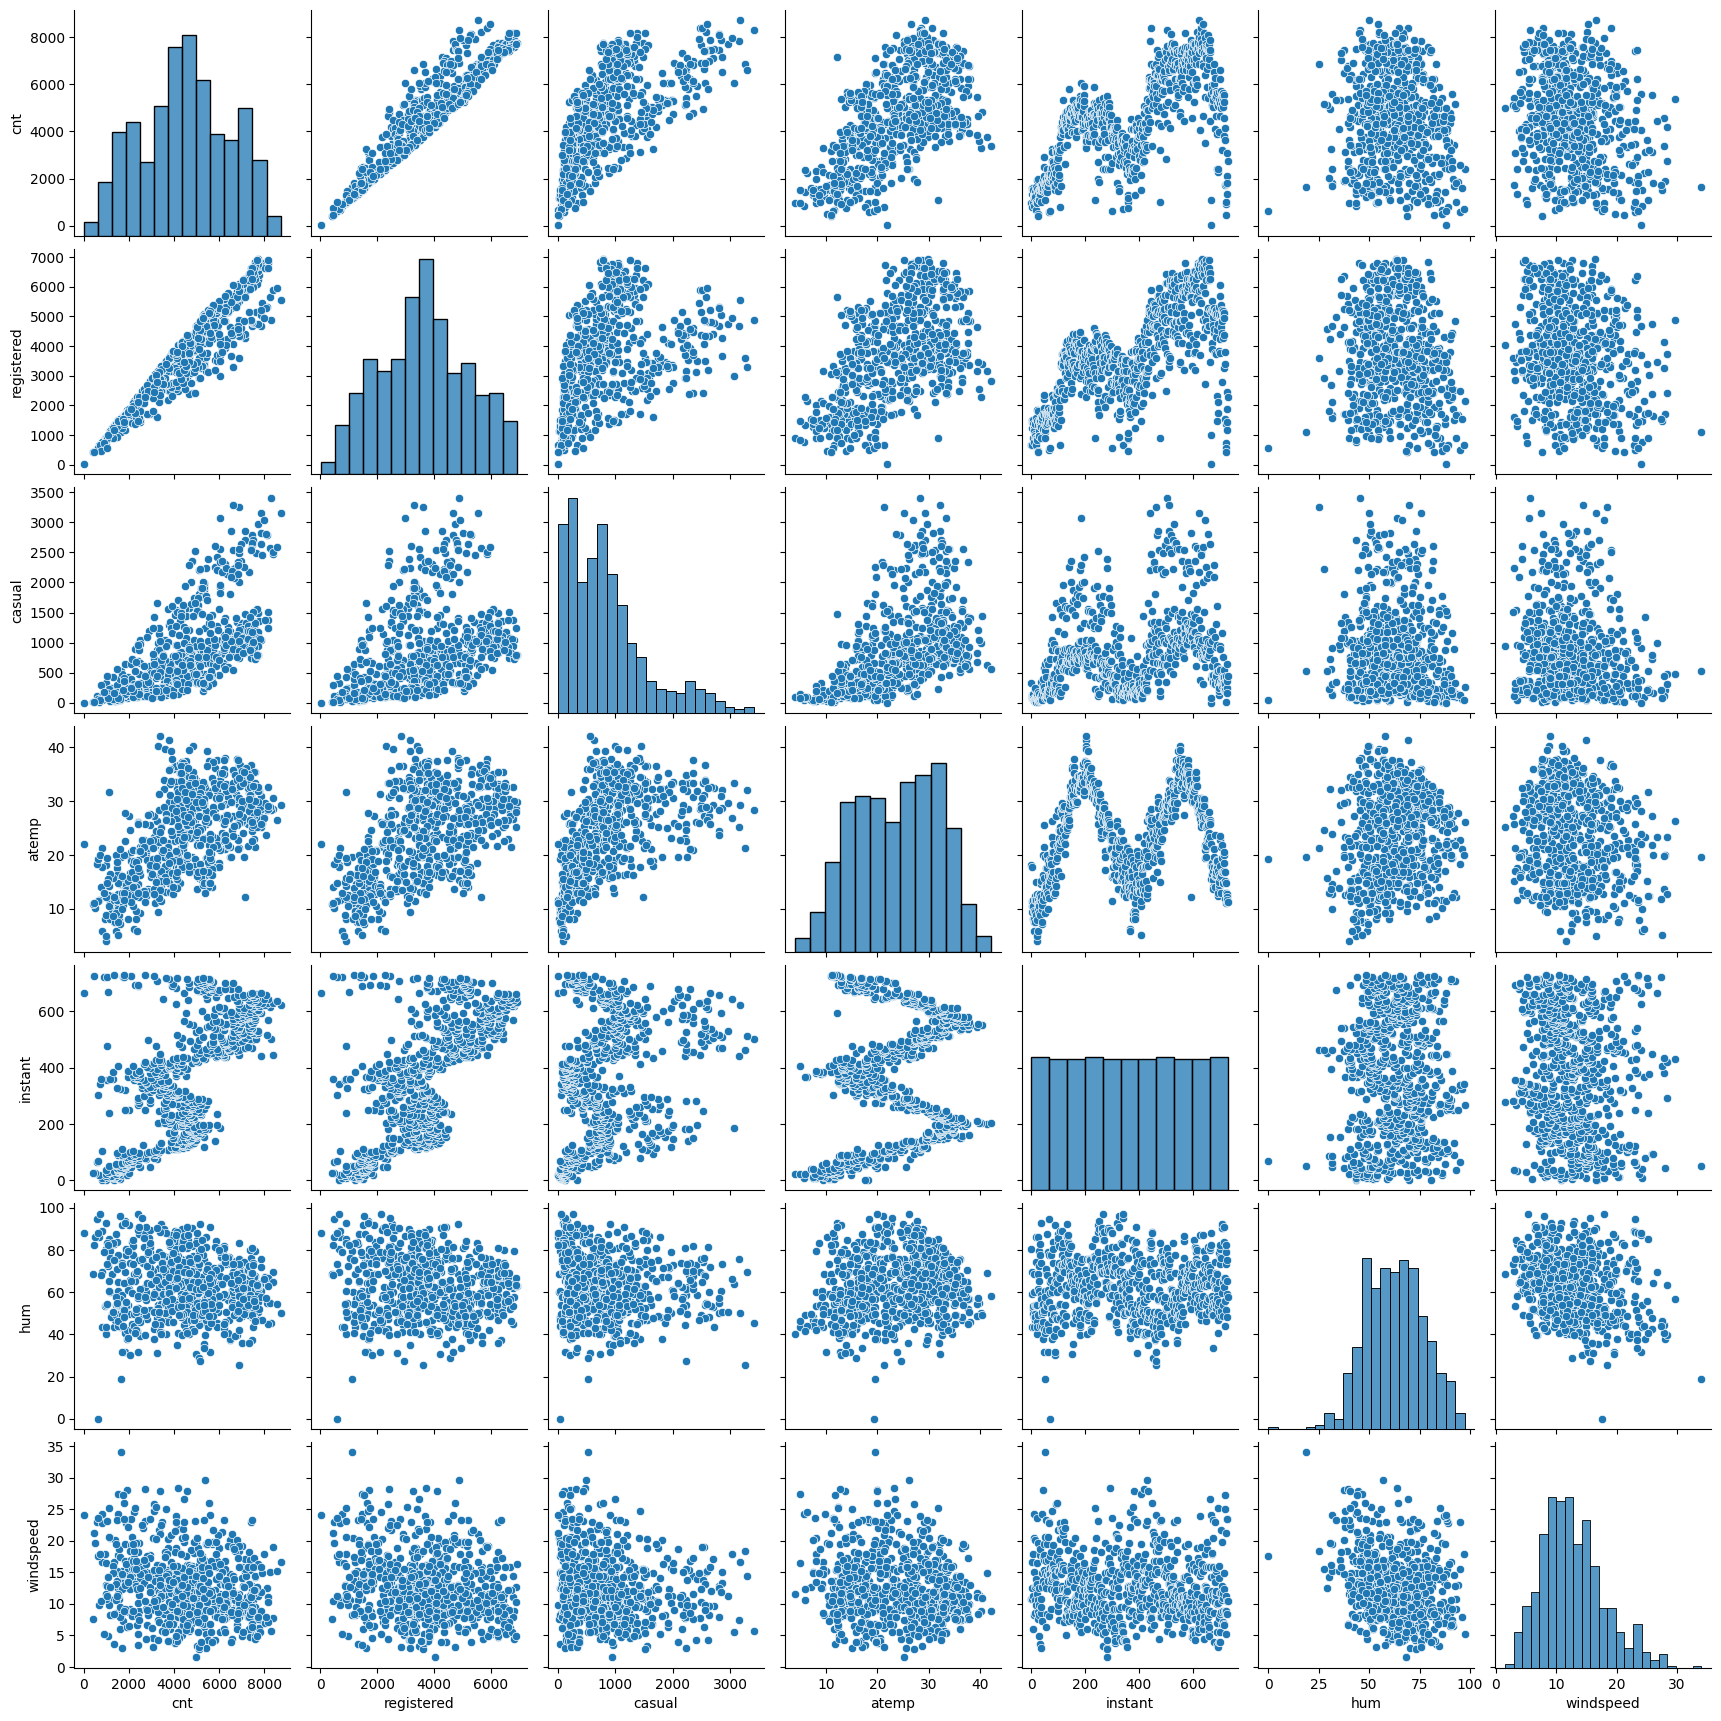

In [236]:
# Lets take few variables according to corr and check visually
numeric_vars = ['cnt', 'registered', 'casual', 'atemp', 'instant', 'hum', 'windspeed']
sns.pairplot(rental_df[numeric_vars])
plt.show()

### clearly registered, casual, temp and instant havel liner relation

### Categorical variable - year, holiday, temp and spring season are important categorical variable

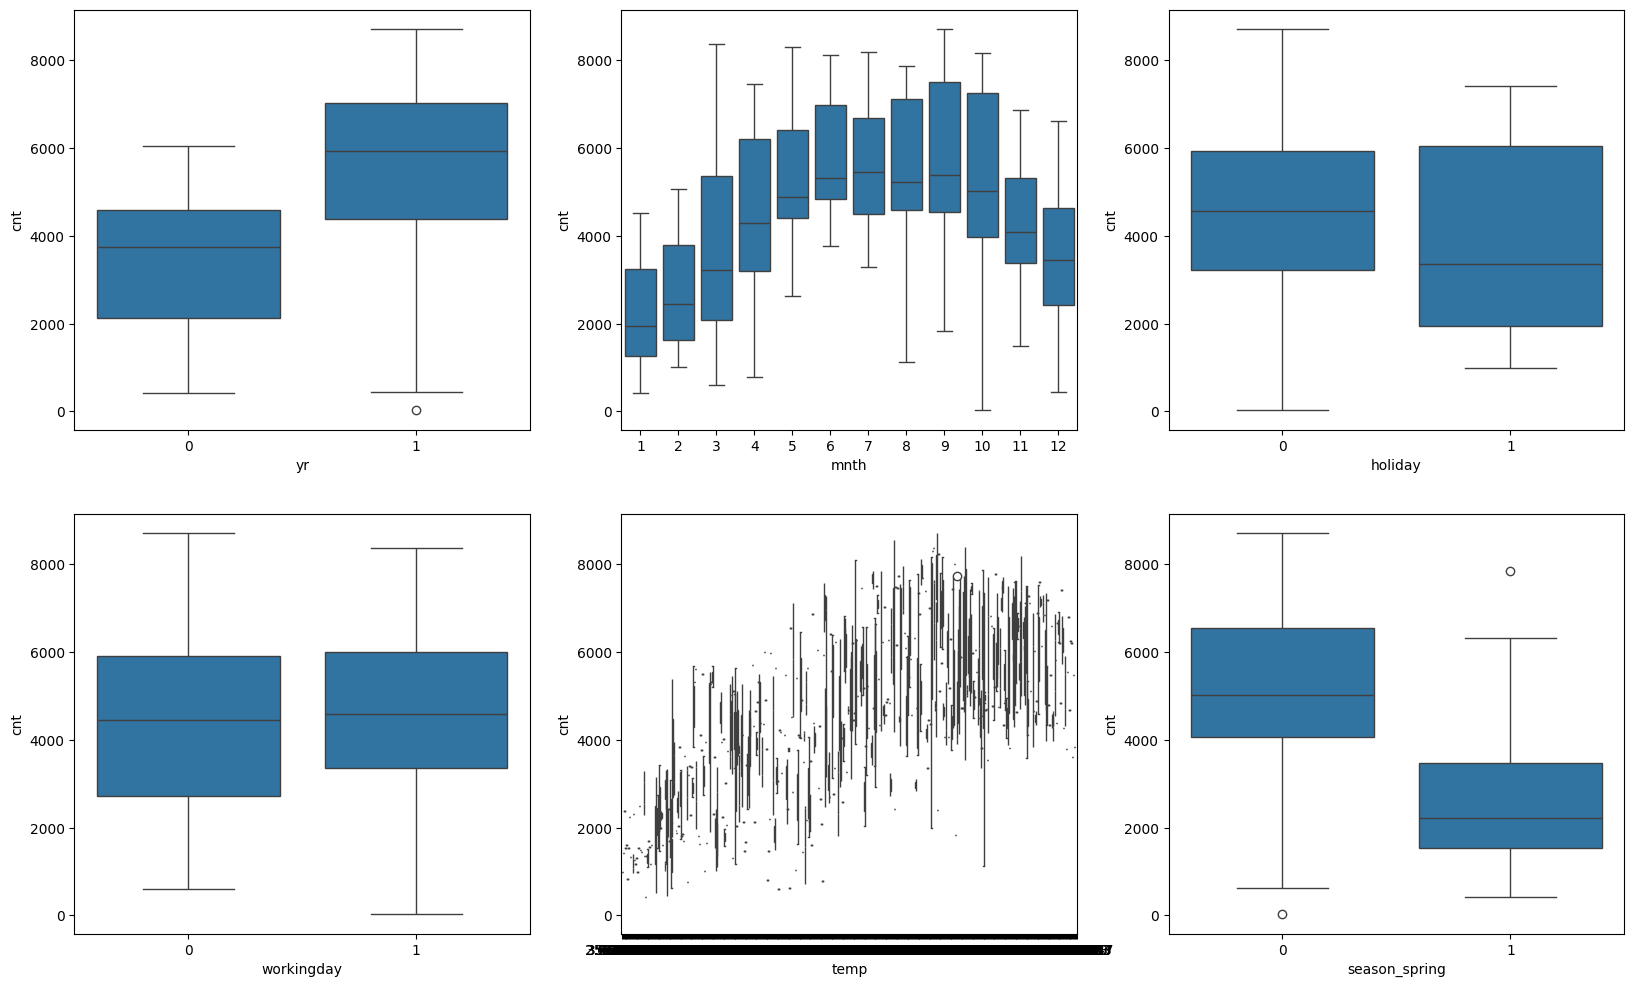

In [237]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = rental_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = rental_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = rental_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = rental_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'temp', y = 'cnt', data = rental_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'season_spring', y = 'cnt', data = rental_df)
plt.show()

### Since variable count is more and most of them have impact on the target variable - Go with RFE

### Splitting the Data into Training and Testing Sets

In [238]:
df_train, df_test = train_test_split(rental_df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 18)
(219, 18)


In [239]:
df_train.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersitcloudy_mist,weathersitlight_snow_rain
653,654,1,10,0,2,1,19.201653,23.0423,55.8333,12.208807,922,6612,7534,0,0,1,0,0
576,577,1,7,0,2,1,29.246653,33.1448,70.4167,11.083475,968,6248,7216,0,0,0,0,0
426,427,1,3,0,6,0,16.980847,20.6746,62.1250,10.792293,956,3110,4066,1,0,0,1,0
728,729,1,12,0,0,0,10.489153,11.5850,48.3333,23.500518,364,1432,1796,1,0,0,0,0
482,483,1,4,0,6,0,15.443347,18.8752,48.9583,8.708325,1120,3100,4220,0,1,0,1,0


In [240]:
scaler = MinMaxScaler()
num_vars = ['instant', 'mnth', 'holiday', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersitcloudy_mist,weathersitlight_snow_rain
653,0.896978,1,0.818182,0.0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,0,0,1,0,0
576,0.791209,1,0.545455,0.0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,0,0,0,0
426,0.585165,1,0.181818,0.0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,0,0,1,0
728,1.000000,1,1.000000,0.0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,0,0,0,0
482,0.662088,1,0.272727,0.0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,1,0


In [241]:
y_train = df_train.pop('cnt')
X_train = df_train

## RFE - To build model
#### import needed libs

In [242]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [243]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [244]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', np.True_, np.int64(1)),
 ('yr', np.True_, np.int64(1)),
 ('mnth', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('weekday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(5)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.False_, np.int64(4)),
 ('casual', np.True_, np.int64(1)),
 ('registered', np.True_, np.int64(1)),
 ('season_spring', np.False_, np.int64(3)),
 ('season_summer', np.True_, np.int64(1)),
 ('season_winter', np.False_, np.int64(2)),
 ('weathersitcloudy_mist', np.False_, np.int64(6)),
 ('weathersitlight_snow_rain', np.True_, np.int64(1))]

In [245]:
# Selected features
selected_features = X_train.columns[rfe.support_]
print("\nSelected features:")
print(selected_features)

# Dropped features
dropped_features = X_train.columns[~rfe.support_]
print("\nDropped features:")
print(dropped_features)


Selected features:
Index(['instant', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'hum', 'casual', 'registered', 'season_summer',
       'weathersitlight_snow_rain'],
      dtype='object')

Dropped features:
Index(['atemp', 'windspeed', 'season_spring', 'season_winter',
       'weathersitcloudy_mist'],
      dtype='object')


In [246]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[selected_features]

In [247]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [248]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [249]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.966e+29
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:39:07   Log-Likelihood:                 16394.
No. Observations:                 510   AIC:                        -3.276e+04
Df Residuals:                     497   BIC:                        -3.271e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [250]:
# Drop one of the correlated features (e.g., registered)
#rental_df = rental_df.drop(columns=['registered'])
X_train_new = X_train_rfe.drop(["registered"], axis = 1)

In [251]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     353.9
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          2.99e-227
Time:                        16:39:09   Log-Likelihood:                 593.54
No. Observations:                 510   AIC:                            -1163.
Df Residuals:                     498   BIC:                            -1112.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [252]:
X_train_new1 = X_train_new.drop(["holiday"], axis = 1)
X_train_lm = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     389.8
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          1.69e-228
Time:                        16:39:11   Log-Likelihood:                 593.40
No. Observations:                 510   AIC:                            -1165.
Df Residuals:                     499   BIC:                            -1118.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [253]:
X_train_new1.columns

Index(['const', 'instant', 'yr', 'mnth', 'weekday', 'workingday', 'temp',
       'hum', 'casual', 'season_summer', 'weathersitlight_snow_rain'],
      dtype='object')

In [254]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,instant,556.16
2,yr,423.23
3,mnth,142.73
0,const,34.34
8,casual,3.28
6,temp,2.12
5,workingday,1.99
9,season_summer,1.27
7,hum,1.17
10,weathersitlight_snow_rain,1.10


In [255]:
X_train_new1 = X_train_new1.drop(["instant"], axis = 1)
X_train_lm = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     433.7
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          8.85e-230
Time:                        16:39:16   Log-Likelihood:                 593.29
No. Observations:                 510   AIC:                            -1167.
Df Residuals:                     500   BIC:                            -1124.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [256]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.10
7,casual,3.28
5,temp,2.12
4,workingday,1.99
2,mnth,1.30
8,season_summer,1.27
1,yr,1.17
6,hum,1.17
9,weathersitlight_snow_rain,1.10
3,weekday,1.02


## Residual Analysis of the train data

### Residual Analysis of the train data

In [257]:
# Calculate predictions and R-squared
y_train_price = lm.predict(X_train_new1)
r_squared = r2_score(y_train, y_train_price)
print(f'R-squared score: {r_squared}')

R-squared score: 0.8864586676547985


Text(0.5, 0, 'Errors')

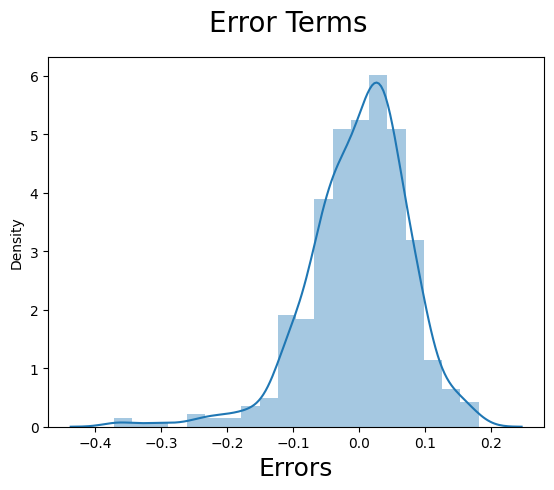

In [258]:

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)  

### Making Predictions
####  Applying the scaling on the test sets

In [259]:
df_test.columns

Index(['instant', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_spring', 'season_summer', 'season_winter',
       'weathersitcloudy_mist', 'weathersitlight_snow_rain'],
      dtype='object')

In [260]:
num_vars = ['instant', 'mnth', 'holiday', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersitcloudy_mist,weathersitlight_snow_rain
184,0.252747,0,0.545455,1.0,0.166667,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,0,0,0,1,0
535,0.734890,1,0.454545,0.0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,0,1,0,0,0
299,0.410714,0,0.818182,0.0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,0,0,1,1,0
221,0.303571,0,0.636364,0.0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,0,0,0,0,0
152,0.208791,0,0.454545,0.0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,0,1,0,0,0


In [261]:
y_test = df_test.pop('cnt')
X_test = df_test

In [262]:
# Add constant to X_test
X_test_with_const = sm.add_constant(X_test)
X_test_new = X_test_with_const[X_train_new1.columns]

In [263]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

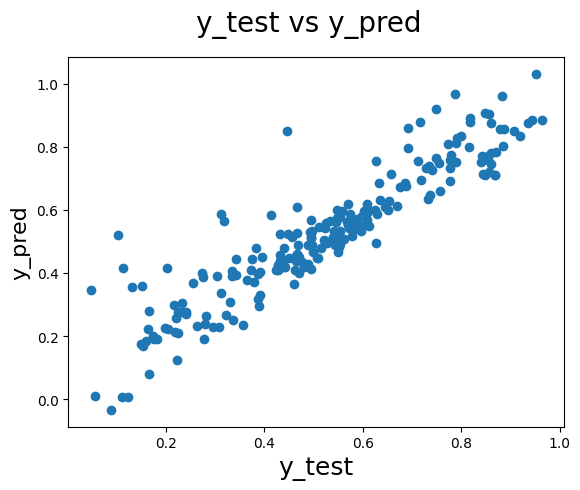

In [264]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [265]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are already defined
r_squared = r2_score(y_test, y_pred)
print(f'R-squared score on the test set: {r_squared}')

R-squared score on the test set: 0.8388987360438379
